In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sb.set(rc={'figure.figsize':(12,8)})

In [ ]:
df = pd.read_excel("C:/Users/admin/Desktop/Fraud Analysis.xlsx", sheet_name = None)

In [ ]:
df.keys()

dict_keys(['Information', 'Order Data'])

In [ ]:
df = df["Order Data"]

In [ ]:
data = df.copy()

In [ ]:
data = data.iloc[:, :-3]

In [ ]:
data

,Event Time,Investigator Action,Order ID,PAYMENT_TYPE,PAYMENT_TYPE 2,BUSINESS_CHANNEL,BPN_NUMBER,Shipping Method,Feedback Type
0,2020-01-16,Accepted by System,PB10878417,reserveAccount,reserveAccount,Product A,10000144,ground,Genuine Customer
1,2020-01-13,Accepted by System,PB10861140,PB Invoice,PB Invoice,Product B,10000203,ground,Genuine Customer
2,2020-03-25,Accepted by System,PB11212392,PurchasePower,PurchasePower,Product A,10000203,ground,Genuine Customer
3,2020-03-01,Reject,PB11096014,PurchasePower,PurchasePower,Product B,10000238,ground,Genuine Customer
4,2020-03-01,Reject,PB11096015,PurchasePower,PurchasePower,Product B,10000238,ground,Genuine Customer
...,...,...,...,...,...,...,...,...,...
105802,2020-03-30,Reject,PB11238250,VISA,Visa / Mastercard,Product E,New Customer,unknown,Genuine Customer
105803,2020-03-30,Reject,PB11244366,VISA,Visa / Mastercard,Product A,New Customer,ground,Genuine Customer
105804,2020-03-30,Reject,PB11244366,VISA,Visa / Mastercard,Product A,New Customer,ground,Genuine Customer
105805,2020-03-30,Reject,PB11244366,VISA,Visa / Mastercard,Product A,New Customer,ground,Genuine Customer


# Exploratory data analysis

In [ ]:
data.isnull().sum()

Event Time             0
Investigator Action    0
Order ID               0
PAYMENT_TYPE           0
PAYMENT_TYPE 2         0
BUSINESS_CHANNEL       0
BPN_NUMBER             0
Shipping Method        0
Feedback Type          0
dtype: int64

Observation No missing data in the datasets

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105807 entries, 0 to 105806
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Event Time           105807 non-null  datetime64[ns]
 1   Investigator Action  105807 non-null  object        
 2   Order ID             105807 non-null  object        
 3   PAYMENT_TYPE         105807 non-null  object        
 4   PAYMENT_TYPE 2       105807 non-null  object        
 5   BUSINESS_CHANNEL     105807 non-null  object        
 6   BPN_NUMBER           105807 non-null  object        
 7   Shipping Method      105807 non-null  object        
 8   Feedback Type        105807 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 7.3+ MB


Observation

105807 line Items in the data with all features being an object and a datetime with no continuous data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,105807.0,2020.000000,0.000000,2020.0,2020.0,2020.0,2020.0,2020.0
Month,105807.0,1.971533,0.831721,1.0,1.0,2.0,3.0,3.0
Day,105807.0,15.274178,8.506585,1.0,7.0,15.0,23.0,30.0


In [ ]:
# no viable information here since all the features are categorical data

In [ ]:
for i in list(data.drop("Event Time", axis = 1)):
    print(data[i].value_counts())

Accepted by System    97688
Approve                7224
Reject                  895
Name: Investigator Action, dtype: int64
PB10813464    19
PB10974965    18
PB10910261    17
PB11070296    16
PB11097094    15
              ..
PB11045243     1
PB10928415     1
PB11213757     1
PB11004728     1
PB11065933     1
Name: Order ID, Length: 85654, dtype: int64
PurchasePower      40201
PB Invoice         28531
VISA               19221
Master Card         7725
AMEX                7147
reserveAccount      2325
Discover             300
Techincal Issue      230
ZPBI                  98
ACH                   24
PayLater               5
Name: PAYMENT_TYPE, dtype: int64
PurchasePower        40201
PB Invoice           28629
Visa / Mastercard    26946
AMEX                  7147
reserveAccount        2325
Discover               300
Techincal Issue        230
ACH                     24
PayLater                 5
Name: PAYMENT_TYPE 2, dtype: int64
Product B    88112
Product A    15103
Product E     1922
Pr

In [ ]:
data["Feedback Type"].value_counts(normalize = True)* 100

Genuine Customer    99.827989
Fraud                0.154999
False Positive       0.017012
Name: Feedback Type, dtype: float64

Observation

99.8% of the Feedback gotten from the system are Genuine customers.
This Create an imbalance datasets in the data.


Another Observation, if an Observation is False Positive, That means, the system generally detect the transcating customer is not a genuine customer.
Making Fraud and False positive overlap as same target



In [ ]:
data["Feedback Type"]= np.where(data["Feedback Type"] == "False Positive", "Fraud", data["Feedback Type"])       

In [ ]:
data["Feedback Type"].value_counts(normalize = True)* 100

Genuine Customer    99.827989
Fraud                0.172011
Name: Feedback Type, dtype: float64

<AxesSubplot:xlabel='Feedback Type', ylabel='count'>

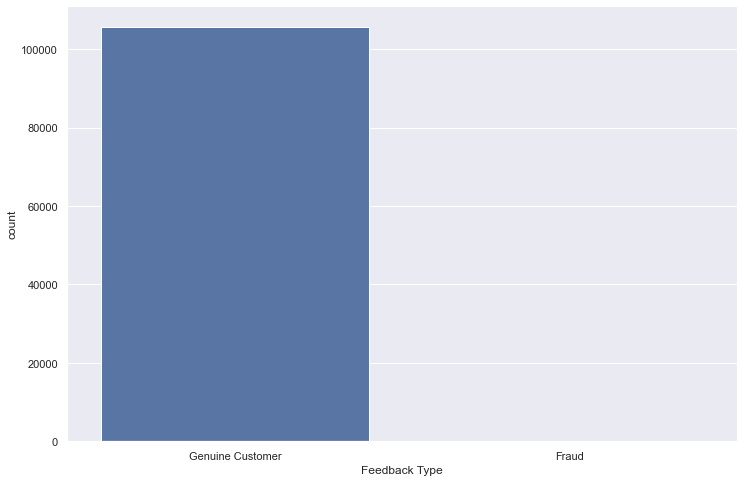

In [ ]:
sb.countplot(x = "Feedback Type", data = data)

<AxesSubplot:xlabel='count', ylabel='BUSINESS_CHANNEL'>

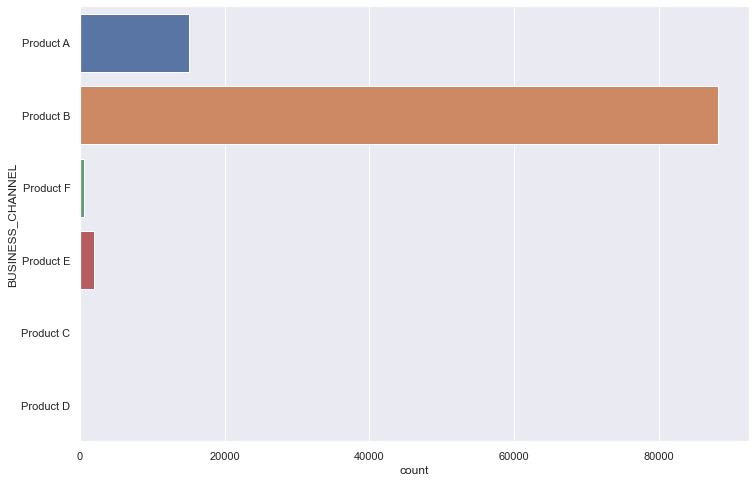

In [ ]:
 sb.countplot(y = "BUSINESS_CHANNEL", data = data) 

Observation

Over 80,000 are carried out through Business Channel B. this is followed by product A at close to 20,000 with Channel  C and D rarely used
to order by the customers.

In [ ]:
print(*list(data))

Event Time Investigator Action Order ID PAYMENT_TYPE PAYMENT_TYPE 2 BUSINESS_CHANNEL BPN_NUMBER Shipping Method Feedback Type


In [ ]:
# Dealing with datetime


data["Event Time"] = pd.to_datetime(data['Event Time'])
data["Year"] = data["Event Time"].dt.year
data["Month"] = data["Event Time"].dt.month
data["Day"] = data["Event Time"].dt.day
data["Month name"] = data["Event Time"].dt.month_name()
data["Weekday"] = data["Event Time"].dt.day_name()

In [ ]:
data.head()

,Event Time,Investigator Action,Order ID,PAYMENT_TYPE,PAYMENT_TYPE 2,BUSINESS_CHANNEL,BPN_NUMBER,Shipping Method,Feedback Type,Year,Month,Day,Month name,Weekday
0,2020-01-16,Accepted by System,PB10878417,reserveAccount,reserveAccount,Product A,10000144,ground,Genuine Customer,2020,1,16,January,Thursday
1,2020-01-13,Accepted by System,PB10861140,PB Invoice,PB Invoice,Product B,10000203,ground,Genuine Customer,2020,1,13,January,Monday
2,2020-03-25,Accepted by System,PB11212392,PurchasePower,PurchasePower,Product A,10000203,ground,Genuine Customer,2020,3,25,March,Wednesday
3,2020-03-01,Reject,PB11096014,PurchasePower,PurchasePower,Product B,10000238,ground,Genuine Customer,2020,3,1,March,Sunday
4,2020-03-01,Reject,PB11096015,PurchasePower,PurchasePower,Product B,10000238,ground,Genuine Customer,2020,3,1,March,Sunday


Text(0.5, 1.0, 'Payment Type Distribution')

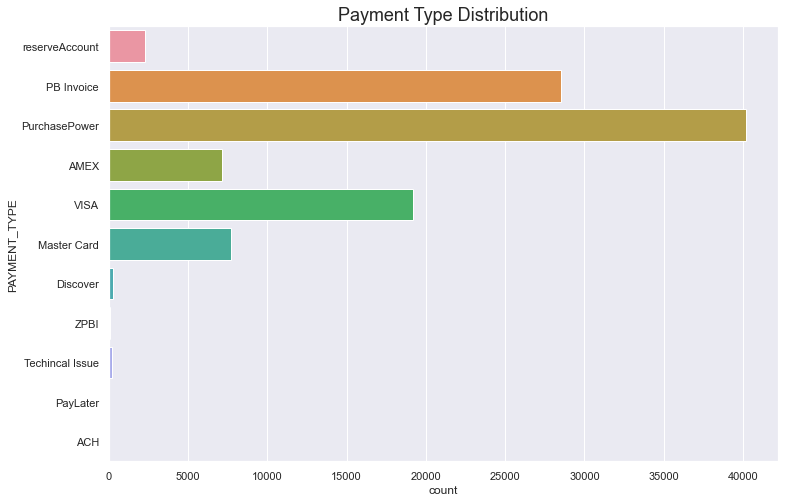

In [ ]:
sb.countplot(y = "PAYMENT_TYPE", data = data) 
plt.title("Payment Type Distribution", size = 18)



O
Purchase Power and top the payment type for all orders with 40,000 records follow by PB invoice doing 250000.
ACH, Pay:ater, Technical Issue are the least Payment type use by customers

Text(0.5, 1.0, 'Investigation Action Distribution')

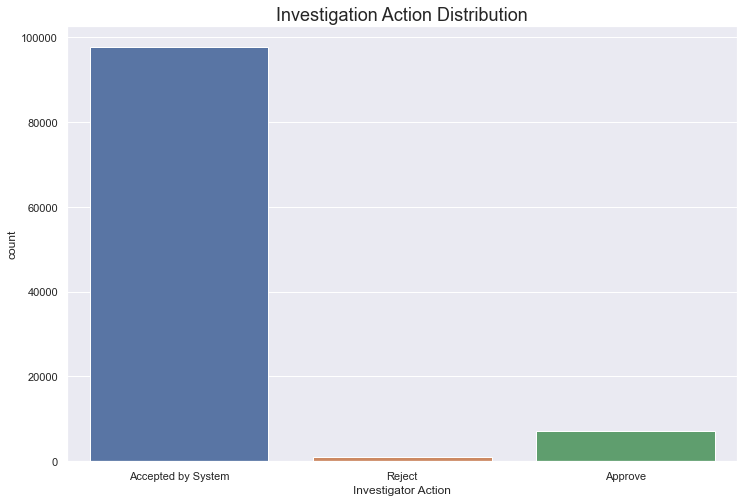

In [ ]:
sb.countplot(x = "Investigator Action", data = data) 
plt.title("Investigation Action Distribution", size = 18)

Most of the order are accepted by the system. close to 1000000 are accepted by the system by the investigator action. just few around 10000 of the 
total order by the customers are rejected and around 10000 approved by the system

Text(0.5, 1.0, 'Shipping Distribution')

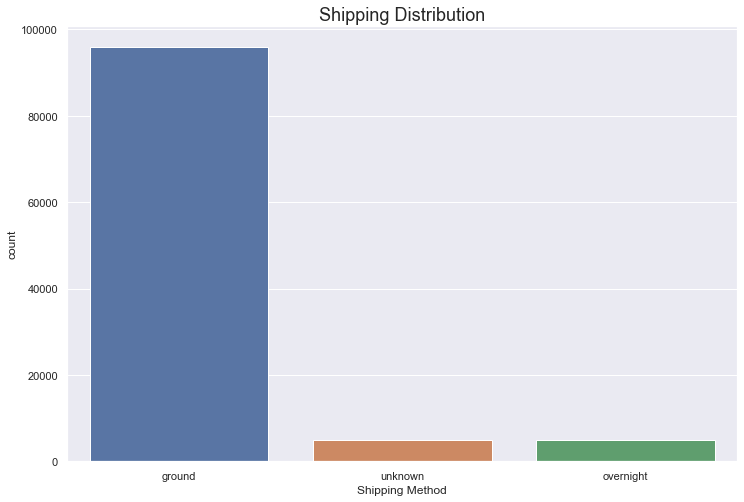

In [ ]:
sb.countplot(x = "Shipping Method", data = data) 
plt.title("Shipping Distribution", size = 18)

# Dealing with Fraudulent Feedback

In [ ]:
Fraud = data.loc[data["Feedback Type"]=="Fraud"]
Fraud

NameError: ignored

In [ ]:
Fraud.groupby(["Year", "Month name"])["Feedback Type"].size().unstack(0).plot(kind = "bar", color = "green", legend = None)

Observation

Most of the Fraudulent transcation are carried out in January totalling 90. This reduce back in Febraury to close to 40 before increasing again
in match to about 60

In [ ]:
pd.DataFrame(Fraud.groupby("Shipping Method")['Feedback Type'].size()).plot(kind = "bar")

Observation

Most Fraudulent transactuon are carried out using shipping method



In [ ]:
list(Fraud)

In [ ]:
pd.DataFrame(Fraud.groupby(["Weekday"])['Feedback Type'].size()).plot(kind = "bar", legend = None, color = "gold")

Observation:
    
    Fraudulent order are carried out on Thursday.
    Least occurence happens during saturdau and sunday

In [ ]:
pd.DataFrame(Fraud.groupby(["BUSINESS_CHANNEL"])['Feedback Type'].size()).plot(kind = "barh", legend = None, color = "orange")
plt.title("Fraudulent Order by Days and Channel", size = 18)

obseration:
    Fraudulent Transcations are majorly arried out thorugh Business Channel Product B accounting for over 120 of the fraud perpetrated follow
    by product A coverng over 40 fraud.
    The least channel used for Fraudulent order is product E.
    
    

In [ ]:
pd.DataFrame(Fraud.groupby(["Weekday", "BUSINESS_CHANNEL"])['Feedback Type'].size()).plot(kind = "barh", legend = None, color = "orange")
plt.title("Fraudulent Order by Days and Channel", size = 18)

Observation:
    Fraudulent transcation ostly carried out on Thrsday are carried out most with Business Channel B with close to 60 frauds.
    least occur on Channel E on Wednesday with less 10 fraud

In [ ]:
pd.DataFrame(Fraud.groupby(["Month name", "BUSINESS_CHANNEL"])['Feedback Type'].size()).plot(kind = "barh", legend = None, color = "orange")
plt.title("Fraudulent Order by Channel and Month", size = 18)

Observation:
    Fraudulent order are majorly carried in channel B in march follow by January.